<a href="https://colab.research.google.com/github/hatopopvr/MyBSCloud/blob/main/MyBSCloud_En.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MyBSCloud

<b>Overview</b>

- A tool to create word cloud images of mappers and artists that make up your plays using ScoreSaber data.

- Outputs two types of WordClouds: based on word frequency (white background) and PPWeight (black background).

- You can create a personalized word cloud image using a mask image.

- Google Drive authentication is only used to save your ScoreSaber play data (to reduce access load on the ScoreSaber API).

<b>Data Source</b>

- ScoreSaber Public API - [doc](https://docs.scoresaber.com/)

<b>Author of this notebook</b>

- hatopop ([@hatopop_vr](https://twitter.com/hatopop_vr))

<b>Libraries</b>

This notebook uses the following third-party libraries:

- [**pandas**](https://pandas.pydata.org/): A library for data manipulation and analysis.
- [**numpy**](https://numpy.org/): A library for numerical computations.
- [**matplotlib**](https://matplotlib.org/) & [**seaborn**](https://seaborn.pydata.org/): Libraries for data visualization.
- [**tqdm**](https://tqdm.github.io/): A library to display progress bars.
- [**PIL (Pillow)**](https://pillow.readthedocs.io/en/stable/): A library for image processing.
- [**wordcloud**](https://amueller.github.io/word_cloud/): A library for generating word clouds.
- [**openai**](https://github.com/openai/openai): A library for using the OpenAI API.


In [1]:
#@title ※※※ Input Information ※※※

#@markdown Please enter the following data. { display-mode: "form" }

#@markdown ---
#@markdown <h4>Input Data</h4>

#@markdown <font size="2">`player_id`: This is your ScoreSaber PlayerID. Must be changed.<br/></font>
player_id =  76561198412839195#@param {type:"number"}

#@markdown <font size="2">`google_drive_mount_path`: This is the mount location for Google Drive. No need to change.</font><br/>
google_drive_mount_path = "/content/drive" #@param {type:"string"}

#@markdown <font size="2">`google_drive_dir_path`: This is the save location within Google Drive. Change as needed.</font>
google_drive_dir_path = "/MyDrive/MyBeatSaberAnalysis/data" #@param {type:"string"}

#@markdown ---
#@markdown <h4>Setting</h4>

#markdown <font size="2">`saved_song_list_is_enable`: Use saved song information or not. Check to use.</font>
saved_song_list_is_enable = True #param {type:"boolean"}
#@markdown <font size="2">`saved_player_score_is_enable`: Use saved play information or not. Check to use. ※ Differential download.</font>
saved_player_score_is_enable = True #@param {type:"boolean"}

# #@markdown <font size="2">`acc_recalq_override_is_enable`: Overwrite MaxScore, Acc with recalculated MaxScore, Acc values. Check to use.</font>

# acc_recalq_override_is_enable = True #@param {type:"boolean"}

# #@markdown <font size="2">`beatleader_data_is_enable`: Retrieve BeatLeader data or not. Additional L/R Acc and Replay links. Check to use.</font>

# beatleader_data_is_enable = True #@param {type:"boolean"}

# #@markdown <font size="2">`ranked_song_from_leaderboard_is_enable`: Redownload level-specific map counts for Ranked map clear progress from ScoreSaber LeaderBoard. Check to use.<br /></font>

# #@markdown <font size="2">※ This will only redownload if the number of Ranked maps is not correctly obtained.</font>

# ranked_song_from_leaderboard_is_enable = True #@param {type:"boolean"}

#markdown <font size="2">`ss_plus_is_enable`: Use SS+ for AccRank division or not. Check to use.  </font><br />
ss_plus_is_enable = True #param {type:"boolean"}
#markdown <font size="2">`ss_plus_val`: This is the setting value for SS+. Change as needed. The range is 91-99.
ss_plus_val = 95 #param {type:"slider", min:91, max:99, step:1}
#markdown <font size="2">`latest`: The number of days to be treated as recent achievements. 0 is the same date as today in Japan time. For example, if today is 5/9 and 1, it will be data after 5/8.</font><br />
#markdown <font size="2">※ Please forgive the mixed naming of "latest" and "Recent".</font>
latest =  0#param {type:"integer"}
#markdown <font size="2">`score_mode`: Select the score to retrieve. `HigherScore` will adopt the higher value of `BaseScore` and `ModifieredScore`.</font>
score_mode = "HigherScore" #param ["BaseScore", "ModifieredScore", "HigherScore"]



# #@title ※※※ 入力情報 ※※※

# #@markdown 以下のデータを入力してください。 { display-mode: "form" }

# #@markdown ---
# #@markdown <h4>Input Data</h4>

# #@markdown <font size="2">`player_id` : ScoreSaberのPlayerIDです。変更必須。<br/></font>  
# player_id =  76561198412839195#@param {type:"number"}

# #@markdown <font size="2">`google_drive_mount_path` ：GoogleDriveのマウント先です。変更不要。</font><br/> 
# google_drive_mount_path = "/content/drive" #@param {type:"string"}

# #@markdown <font size="2">`google_drive_dir_path` : GoogleDrive内の保存先です。必要に応じて変更してください。</font> 
# google_drive_dir_path = "/MyDrive/MyBeatSaberAnalysis/data" #@param {type:"string"}

# #@markdown ---
# #@markdown <h4>Setting</h4>

# #markdown <font size="2">`saved_song_list_is_enable`:保存済の曲情報を使用するか。☑で使用。</font> 
# saved_song_list_is_enable = True #param {type:"boolean"}
# #@markdown <font size="2">`saved_player_score_is_enable`: 保存済のプレイ情報を使用するか。☑で使用。※差分ダウンロード。</font>
# saved_player_score_is_enable = True #@param {type:"boolean"}
# # #@markdown <font size="2">`acc_recalq_override_is_enable`: MaxScore,Accを再計算した値をMaxScore,Accに上書きするか。☑で使用。</font> 
# # acc_recalq_override_is_enable = True #@param {type:"boolean"}
# # #@markdown <font size="2">`beatleader_data_is_enable`: BeatLeaderのデータを取得するか。L/RのAccやReplayのリンクなど追加。☑で使用。</font> 
# # beatleader_data_is_enable = True #@param {type:"boolean"}
# # #@markdown <font size="2">`ranked_song_from_leaderboard_is_enable`: Ranked譜面クリア進捗用のレベル別譜面数をScoreSaberのLeaderBoardから取得し直すか。☑で使用。<br /></font>
# # #@markdown <font size="2">※Ranked譜面の譜面数が正しく得られていない時のみ取得し直されます。</font>
# # ranked_song_from_leaderboard_is_enable = True #@param {type:"boolean"}
# #markdown <font size="2">`ss_plus_is_enable`: AccRank区分にSS+を使用するか。☑で使用。  </font><br /> 
# ss_plus_is_enable = True #param {type:"boolean"}
# #markdown <font size="2">`ss_plus_val`:SS+の設定値です。必要に応じて変更ください。範囲は91-99。  
# ss_plus_val = 95 #param {type:"slider", min:91, max:99, step:1}
# #markdown <font size="2">`latest`:直近の成果として扱う対象の日数です。0は日本時間で今日と同じ日付。例)今日が5/9で1なら5/8以降のデータ。</font><br /> 
# #markdown <font size="2">※名称がlatestだったりRecentだったり混在してしまっていますが許してください。</font>
# latest =  0#param {type:"integer"}
# #markdown <font size="2">`score_mode`:取得するスコアを選択します。`HigherScore`は`BaseScore`と`ModifieredScore`の高い方の値を採用します.</font>
# score_mode = "HigherScore" #param ["BaseScore", "ModifieredScore", "HigherScore"]

# # ------------------------
#@title Libraryの取得
# ------------------------
#markdown - Libraryの取得<br >
#markdown - timezoneの設定 (UTC->日本時間 Asia/Tokyo+9:00 ,tz_ja)
#markdown - google driveのマウント<br >

!pip install GitPython

import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import pandas as pd
from pandas import json_normalize
import json
from datetime import datetime, timedelta
from dateutil import tz
import time
from tqdm import tqdm
import requests
import math
import git
from IPython.display import HTML, Javascript,Image, display, Markdown
from google.colab import drive, files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import copy
from wordcloud import WordCloud, STOPWORDS
try:
    import openai
except:
    !pip install openai==0.27.0
    import openai
from collections import defaultdict


#-------------------------------
#@title Timezoneの変更
#-------------------------------
tz_ja = pd.Timestamp(datetime.now()).tz_localize('UTC').tz_convert('Asia/Tokyo')
#today_tz_ja = datetime_now_tz_ja.strftime("%Y.%m.%d")
print("取得日時:{}".format(tz_ja))

#-------------------------------
#@title Google Driveのマウント
#-------------------------------
drive.mount(google_drive_mount_path)

#-------------------------------
#@title 内部設定値
#-------------------------------
# データ元のURL
## song_data_zip_git_url: ScoreSaberの全曲情報のzip(json)のURLです。変更なければそのままで。 
song_data_zip_git_url = "https://github.com/andruzzzhka/BeatSaberScrappedData.git"
## ranked_excluded_data_git_url: ScoreSaberのRank譜面除外リスト(csv)のURLです。暫定的処置。 
ranked_excluded_data_git_url = "https://github.com/hatopopvr/ScoreSaberRankedExcludedMaps.git"
## rankedmapdata_url: BeatSaverデータのcsvのURLです。らっきょさんデータ。 
rankedmapdata_url = 'https://api.github.com/repos/rakkyo150/RankedMapData/releases'
# google drive内のdata置き場親フォルダ
data_path = r"{}{}".format(google_drive_mount_path, google_drive_dir_path)
# player情報の親フォルダ(data_pathの子フォルダ)
player_path = r"{}/players_data/{}".format(data_path, player_id)
## playerinfoの保存先
player_info_path = r"{}/player_info_{}.csv".format(player_path, player_id)
## playerのscore関連保存先
player_score_path = r"{}/scores_full_{}.csv".format(player_path, player_id)
player_ranked_path = r"{}/scores_ranked_{}.csv".format(player_path, player_id)
## playerのscore関連保存先
player_score_pickle_path = r"{}/scores_full_{}.pkl".format(player_path, player_id)
player_ranked_pickle_path = r"{}/scores_ranked_{}.pkl".format(player_path, player_id)
## 曲情報の保存関連
song_clone_path = r"/content/BeatSaberScrappedData"
song_zip_path = r"{}/combinedScrappedData.zip".format(song_clone_path)
song_json_path = r"{}/combinedScrappedData.json".format(data_path)
song_pickle_path = r"{}/combinedScrappedData.pkl".format(data_path)
## 曲情報の保存先
song_list_path = r"{}/song_list_full.csv".format(data_path)
song_ranked_path = r"{}/song_ranked.csv".format(data_path)

# song_playlist_path = r"{}/playlist_{}.json".format(data_path, datetime.now().strftime("%Y%m%d"))
# ランク除外関連パス
ranked_excluded_clone_dir_path = r"/content/ScoreSaberRankedExcludedMaps"
ranked_excluded_clone_csv_path = r"{}/RankedExcludedMaps.csv".format(ranked_excluded_clone_dir_path)
ranked_excluded_csv_path = r"{}/RankedExcludedMaps.csv".format(data_path)
# levelclearランク除外関連パス
#level_cleared_path = r"{}/level_cleared_{}.csv".format(data_path, player_id)
level_cleared_path = r"{}/level_cleared_{}.csv".format(player_path, player_id)

# playlistの保存
song_playlist_path = r"{}/playlists".format(data_path)
song_worst_playlist_path = r"{}/worst_playlist_{}.json".format(song_playlist_path, tz_ja.strftime("%Y%m%d"))
song_top_playlist_path = r"{}/top_playlist_{}.json".format(song_playlist_path, tz_ja.strftime("%Y%m%d"))

# # MｙBSCloudのmask画像の保存
# # player情報の親フォルダ(data_pathの子フォルダ)
# mybscloud_path = r"{}/mybscloud/{}".format(data_path, player_id)

# SS_plus設定値
ss_plus = "SS+{}".format(ss_plus_val)
ss_plus_rate = "SS+{}-Rate".format(ss_plus_val)
# その他 colab表示など設定
pd.options.display.precision = 2
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
page_count=100 #ScoreSaberの1ページあたりのページ数

# 出力最大高さ
def resize_colab_cell():
    display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))

get_ipython().events.register('pre_run_cell', resize_colab_cell)

#-------------------------------
#@title 列情報の設定
#-------------------------------
# Player Infoの記録用列 (TotalFC, RankedFCは別途結合)
cols_info =[
    "Pic"
    ,"name"
    ,"country"
    ,"pp"
    ,"rank"
    ,"countryRank"
    ,"role"
    ,"TotalScore"
    ,"RankedScore"
    ,"AveRankedAcc"
    ,"TotalPlay"
    ,"RankedPlay"
    ,"ReplayWatched"
    ,"ScoreDate"
    ,"TotalFC"
    ,"RankedFC"
    ,"TotalPlayRank"
    ,"TotalPlayJPRank" 
    ,"RankedPlayRank"
    ,"RankedPlayJPRank"
    ,"TotalScoreRank" 
    ,"TotalScoreJPRank"
    ,"RankedScoreRank"
    ,"RankedScoreJPRank" 
    ,"AveRankedAccRank"
    ,"AveRankedAccJPRank"
]

# Player Infoの表示用列 (TotalFC, RankedFCは別途結合)
cols_info_sort =[
    "Pic"
    ,"name"
    ,"country"
    ,"pp"
    ,"rank"
    ,"countryRank"
    ,"role"
    ,"TotalScore"
    ,"RankedScore"
    ,"AveRankedAcc"
    ,"TotalPlay"
    ,"RankedPlay"
    ,"TotalFC"
    ,"RankedFC"
    ,"ReplayWatched"
    ,"ScoreDateJa"
]

# リュナンさんのScoreSaberRanking表示用列(不使用)
cols_info_rank = [
    "TotalPlayRank"
    ,"TotalPlayJPRank" 
    ,"RankedPlayRank"
    ,"RankedPlayJPRank"
    ,"TotalScoreRank" 
    ,"TotalScoreJPRank"
    ,"RankedScoreRank"
    ,"RankedScoreJPRank" 
    ,"AveRankedAccRank"
    ,"AveRankedAccJPRank"
]

# summary用列
cols_summary =[
    "rank"
    ,"countryRank"
    ,"pp"
    ,"AveRankedAcc"
    ,"TotalPlay"
    ,"RankedPlay"
]

# SongList抜粋用列
cols_song =[
    "Cover"
    ,"Song"
    ,"Level"
    ,"LevelStr"
    ,"Stars"
    # ,"maxPP"
    # ,"maxScore"
    ,"Difficulty"
    # ,"Play"
    # ,"DailyPlay"
    ,"CreatedDateJa"
    ,"RankDateJa"
    ,"Bombs"
    ,"Notes"
    ,"Obstacles"
    ,"Njs"
    ,"NjsOffset"
    ,"Bpm"
    ,"Upvotes"
    #,"Downvotes"
    ,"Duration"
    ,"Ranked"
]

# Rank譜面除外リスト結合用列
cols_excluded = [
                 'Hash',
                 'Difficulty',
                 'RankedExcluded'
                 ]

# Score用列
cols_score =[
    "Cover"
    ,"Song"
    ,"Level"
    ,"Stars"
    ,"Acc"
    ,"AccRank"
    ,"FC"
    ,"Rank"
    ,"PP"
    ,"Miss"
    ,"Bad"
    ,"Combo"
    ,"Score"
    #,"Mode"
    ,"Difficulty"
    ,"Play"
    ,"DailyPlay"
    ,"Bpm"
    ,"Duration"
    ,"Notes"
    ,'Nps'
    ,"Njs"
    ,"Bombs"
    ,"Obstacles"
    ,"NjsOffset"
    ,'Upvotesratio' 
    ,"Upvotes"
    ,"Downvotes"
    ,"Ranked"
    ,"Days"
    ,"Months"
    ,"Tags"
    ,"Preview"
 ]

# Acc再計算用列
cols_recalq = [
    'Hash',
    'Cover',
    'SongName',
    'Difficulty', 'Stars', 
    'Ranked', 
    'Notes', 
    'Acc', 
    'AccRecalq', 
    'AccDiff',
    'AccRank', 
    'AccRankRecalq', 
    'MaxScore',
    'MaxScoreRecalq',
    'MaxScoreDiff',
    'Score', 
    'Miss', 
    'Combo',
    'RankDateJa',
    'CreatedDateJa', 
    'Preview'
]

# ScatterPlot用X-Y軸列
cols_xy = [
    "Stars"
    ,"Level"
    ,"Acc"
    ,"Rank"
    ,"PP"
    ,"Miss"
    ,"Bad"
    ,"Combo"
    ,"Score"
    ,"Play"
    ,"DailyPlay"
    ,"Days"
    ,"Months"
    ,"Bpm"
    ,"Duration"
    ,"Notes"
    ,'Nps'
    ,"Njs"
    ,"Bombs"
    ,"Obstacles"
    ,"NjsOffset"
    ,'Upvotesratio'
    ,"Upvotes"
    ,"Downvotes"
]

# RankedMap(BeatSaver)結合用列
cols_rankedmap = ['Hash', 
                  'Difficulty', 
                  'Upvotesratio',
                  'Nps', 
                  'Tags', 'Preview'
]

# ScatterPlot用カテゴリ
cols_cate = [
    "LevelStr"
    ,"Days"
    ,"DaysStr"
    ,"Months"
    ,"MonthsStr"
    ,"LatestStr"
    ,"Acc"
    ,"AccRank"
    ,"FC"
    ,"SongAuthor"
    ,"LevelAuthor"
]

# Worst-Top ScatterPlot用カテゴリ
cols_cate_wt = [
    "WorstTop"
    ,"LevelStr"
    ,"Days"
    ,"DaysStr"
    ,"Months"
    ,"MonthsStr"
    ,"LatestStr"
    ,"Acc"
    ,"AccRank"
    ,"FC"
    ,"SongAuthor"
    ,"LevelAuthor"
]

# Latest_history用の列
cols_latest_history = ['Cover', 'Song', 'Difficulty', 'Stars', 'Acc', 'AccRank', 'FC', 'Rank', 'PP',
       'Miss', 'Bad', 'Combo', 'Score']

#-------------------------------
#@title スタイルの設定
#-------------------------------

cover_image_size=70 #カバー,プロファイル画像のサイズ単位px
info_image_size=150 #Player画像のサイズ単位px

style_format = {
        "rank": "#{:,.0f}",
        "countryRank": "#{:,.0f}",
        "TotalScore": "{:,.0f}",
        "RankedScore": "{:,.0f}",
        "AveRankedAcc": "{:,.2f}%",
        "TotalPlay": "{:,.0f}",
        "TotalFC": "{:,.0f}",
        "RankedFC": "{:,.0f}",
        "ReplayWatched": "{:,.0f}",
        "Level": "{:,.0f}",
        "Stars": "{:,.2f}★",
        "Acc": "{:,.2f}%",
        "AccRecalq": "{:,.2f}%",
        "AccDiff": "{:,.2f}%",
        "MaxScore": "{:,.0f}",
        "MaxScoreRecalq": "{:,.0f}",
        "MaxScoreDiff": "{:,.0f}",
        "Score": "{:,.0f}",
        "Rank": "#{:,.0f}",
        "pp": "{:,.2f}pp",
        "PP": "{:,.2f}pp",
        "Miss": "{:,.0f}",
        "Bad": "{:,.0f}",
        "Combo": "{:,.0f}",
        "Score": "{:,.0f}",
        "Play": "{:,.0f}",
        "DailyPlay": "{:,.0f}",
        "Bpm": "{:,.0f}",
        "Duration": "{:,.0f}",
        "Notes": "{:,.0f}",
        "Nps": "{:,.2f}",
        "Njs": "{:,.0f}",
        "Bombs": "{:,.0f}",
        "Obstacles": "{:,.0f}",
        "NjsOffset": "{:,.2f}",
        "Upvotesratio": "{:,.2f}",
        "Upvotes": "{:,.0f}",
        "Downvotes": "{:,.0f}",
        "Days": "{:,.0f}",
        "Months": "{:,.0f}",
        "Song": "{:,.0f}",
        "RecentCleared": "{:,.0f}",
        "Cleared": "{:,.0f}",
        "NF": "{:,.0f}",
        "NotCleared": "{:,.0f}",
        "AlreadyCleared": "{:,.0f}",
        "NotClearedRate": "{:,.2f}%",
        "AlreadyClearedRate": "{:,.2f}%",
        "RecentClearedRate": "{:,.2f}%",
        "NFRate": "{:,.2f}%",
        "SSS": "{:,.0f}",
        ss_plus: "{:,.0f}",
        "SS": "{:,.0f}",
        "S": "{:,.0f}",
        "A": "{:,.0f}",
        "B": "{:,.0f}",
        "Other": "{:,.0f}",
        "SSS-Rate": "{:,.2f}%",
        "SS-Rate": "{:,.2f}%",
        ss_plus_rate: "{:,.2f}%",
        "S-Rate": "{:,.2f}%",
        "A-Rate": "{:,.2f}%",
        "B-Rate": "{:,.2f}%",
        "Other-Rate": "{:,.2f}%",
        "FC": "{:,.0f}",
        "RecentFC": "{:,.0f}",
        "AlreadyFC": "{:,.0f}",
        "NotFC": "{:,.0f}",
        "AlreadyFCRate": "{:,.2f}%",
        "RecentFCRate": "{:,.2f}%",
        "NotFCRate": "{:,.2f}%",
        "Song": "{:,.0f}",
        "TotalPlayRank": "#{:,.0f}",
        "TotalPlayJPRank": "#{:,.0f}",
        "RankedPlayRank": "#{:,.0f}",
        "RankedPlayJPRank": "#{:,.0f}",
        "TotalScoreRank": "#{:,.0f}",
        "TotalScoreJPRank": "#{:,.0f}",
        "RankedScoreRank": "#{:,.0f}",
        "RankedScoreJPRank": "#{:,.0f}",
        "AveRankedAccRank": "#{:,.0f}",
        "AveRankedAccJPRank": "#{:,.0f}",
     }

ss_plus = "SS+{}".format(ss_plus_val)
ss_plus_rate = "SS+{}-Rate".format(ss_plus_val)

style_worst_top = {
        "Level": "{:,.0f}",
        "Stars": "{:,.2f}★",
        "Acc": "{:,.2f}%",
        "Rank": "#{:,.0f}",
        "pp": "{:,.2f}pp",
        "PP": "{:,.2f}pp",
        "Miss": "{:,.0f}",
        "Bad": "{:,.0f}",
        "Combo": "{:,.0f}",
        "Score": "{:,.0f}",
        "Play": "{:,.0f}",
        "DailyPlay": "{:,.0f}",
        "Bpm": "{:,.0f}",
        "Duration": "{:,.0f}",
        "Notes": "{:,.0f}",
        "Nps": "{:,.2f}",
        "Njs": "{:,.0f}",
        "Bombs": "{:,.0f}",
        "Obstacles": "{:,.0f}",
        "NjsOffset": "{:,.2f}",
        "Upvotesratio": "{:,.2f}",
        "Upvotes": "{:,.0f}",
        "Downvotes": "{:,.0f}",
        "Days": "{:,.0f}",
        "Months": "{:,.0f}",
     }

def color_negative_red(val):
    color = 'red' if val < 0 else 'blue'
    return 'color: %s' % color

# Difficulty color
def color_difficulty(val):
    if val == "Easy":
        return 'color: #66BB6A; font-weight: bold;'
        color = "#66BB6A"
    elif val == "Normal":
        return 'color: #29B6F6; font-weight: bold;'
        color = "#29B6F6"
    elif val == "Hard":
        return 'color: #FB8C00; font-weight: bold;'
        color = "#FB8C00"
    elif val == "Expert":
        return 'color: #E53935; font-weight: bold;'
        color = "#E53935"
    elif val == "Expert+":
        return 'color: #8E24AA; font-weight: bold;'
        color = "#8E24AA"
    elif val == "ExpertPlus":
        return 'color: #8E24AA; font-weight: bold;'
        color = "#8E24AA"
    return 'color: %s' % color

# Acc Rank color
def color_acc_rank(val):
    if val == "SSS":
        return 'color: #00ffff; font-weight: bold;'
    elif ss_plus_is_enable and val == ss_plus:
        return 'color: #636EFA; font-weight: bold;'
    elif val == "SS":
        return 'color: #ff4500; font-weight: bold;'
    elif val == "S":
        return 'color: #ffaaff; font-weight: bold;'
    elif val == "A":
        return 'color: #ffcc66; font-weight: bold;'
        #color = "#eebb55"
    elif val == "B":
        return 'color: #cccc66; font-weight: bold;'
    else:
        return 'color: #666666; font-weight: bold;'
    # return 'color: %s' % color

# FC color
def color_fc(val):
    if val == "FC":
        color = "#23D160"
    else:
        color = "black"        
    return 'color: %s' % color

def color_fc(val):
    if val == "FC":
        return 'color: #23D160; font-weight: bold;'
    else:
        return 'color: black'


# Player Info Table Format
styles_info = [
    dict(selector="td", props=[("font-size", "130%"),
                               ("text-align", "center"),
                               ("padding-top", "0px"),
                               ("padding-bottom", "0px"),                              
                               ])
]

# Player Info Table Format
styles_data = [
    {"selector":"td", "props":[("padding-top", "0px"),
                               ("padding-bottom", "0px"),                              
                               ]},
    {"selector":"th", "props":[("padding-top", "0px"),
                               ("padding-bottom", "0px"),                              
                               ]},
]

#SS+95	SS+95-Rate FC

#-------------------------------
#@title 各種フォルダの作成
#-------------------------------
# 各種パスのディレクトリ作成
## データ大元のフォルダ作成
if os.path.exists(data_path) == False:
    print('MyBeatSaberAnalytics用のデータ格納フォルダをGoogle Driveに新規作成します。')
    print('データ格納フォルダ:{}'.format(data_path))     
    os.makedirs(data_path, exist_ok=True)
    print('作成が完了しました。')         

## データ大元のフォルダ作成
if os.path.exists(player_path) == False:
    old_player_info_path = r"{}/player_info_{}.csv".format(data_path, player_id)
    print('PlayerID:{}用のデータ格納フォルダを新規作成します。'.format(player_id))
    print('playerフォルダ:{}'.format(player_path))     
    print('作成が完了しました。')         
    os.makedirs(player_path, exist_ok=True)
    if os.path.isfile(old_player_info_path):
        print('データ引継ぎのため、player_infoｂのcsvファイルを上記フォルダに移動させます。')
        print('移動前:{}'.format(old_player_info_path))
        print('移動後:{}'.format(player_info_path))
        shutil.move(old_player_info_path, player_info_path)
        print('移動が完了しました。')

## プレイヤー用のフォルダ作成
if os.path.exists(song_playlist_path) == False:
    print('Playlist格納用のフォルダを新規作成します。')
    print('Playlist格納フォルダ:{}'.format(song_playlist_path))     
    os.makedirs(song_playlist_path, exist_ok=True)
    print('作成が完了しました。')       


# ## MyBSCloud用のフォルダ作成
# if os.path.exists(mybscloud_path) == False:
#     print('MyBSCloud格納用のフォルダを新規作成します。')
#     print('MyBSCloud格納用のフォルダ:{}'.format(mybscloud_path))     
#     os.makedirs(mybscloud_path, exist_ok=True)
#     print('作成が完了しました。')       


#-------------------------------
#@title Player情報の取得
#-------------------------------
#markdown Get Player Info (df_info)
url = r"https://scoresaber.com/api/player/{}/full".format(player_id)
response = requests.get(url)
res_data = response.json()
df_info = json_normalize(res_data)

#df_info["Pic"] = '<img src="'+df_info["profilePicture"]+'"/>'
df_info["Pic"] = '<img src="'+df_info["profilePicture"]+'" style="width:{}px;"/>'.format(info_image_size)
df_info["TotalScore"] = df_info["scoreStats.totalScore"]
df_info["RankedScore"] = df_info["scoreStats.totalRankedScore"]
df_info["AveRankedAcc"] = df_info["scoreStats.averageRankedAccuracy"]
df_info["TotalPlay"] = df_info["scoreStats.totalPlayCount"]
df_info["RankedPlay"] = df_info["scoreStats.rankedPlayCount"]
df_info["ReplayWatched"] = df_info["scoreStats.replaysWatched"]
df_info["ScoreDate"] = datetime.now().strftime("%Y/%m/%d %H:%M:%S")

df_info["ScoreDateUtc"] = pd.to_datetime(df_info['ScoreDate'], utc=True)
_df_info_idx = df_info.set_index("ScoreDateUtc")
df_info["ScoreDateJa"] = _df_info_idx.index.tz_convert("Asia/Tokyo")

PlayCount = df_info["TotalPlay"][0]
RangeCount = math.ceil(PlayCount / page_count) + 1

print("Player:{}, Play数:{}, Page数:{}".format(df_info["name"][0], PlayCount, RangeCount))

display(df_info[['Pic','name','TotalPlay']].style.set_table_styles(styles_info).format(style_format, na_rep="-")) 


#-------------------------------
#@title Score情報の取得
#-------------------------------
#markdown Get Player Scores<br/>
#markdown df_scores:もろもろ結合<br/>
#markdown df_scores_org:ScoreSaber APIのデータのみ  

def func_mode(x):
    if  x == "SoloStandard":
        return "Standard"
    else:
        return x

def func_score(x):
    if  x > 100:
        return "-"
    elif x == 100:
        return "SSS"
    elif x >= ss_plus_val and ss_plus_is_enable:
        return ss_plus
    elif x >= 90:
        return "SS"
    elif x >= 80:
        return "S"
    elif x >= 65:
        return "A"
    elif x >= 50:
        return "B"
    elif x >= 35:
        return "C"
    elif x >= 20:
        return "D"
    elif x >= 0:
        return "E"
    else:
        return "-"

def func_fc(x):
    if  x:
        return "FC"
    else:
        return "-"

def func_latest(x):
    if  x <= latest:
        return 1
    else:
        return 0

if saved_player_score_is_enable and os.path.exists(player_score_pickle_path):    
    df_scores_pkl = pd.read_pickle(player_score_pickle_path)
    _df_scores_pkl = df_scores_pkl.head(0)

    i = 1
    while True:
        url = r"https://scoresaber.com/api/player/{}/scores?sort=recent&page={}&limit={}".format(player_id, i, page_count)
        try:
            response = requests.get(url)
            res_data = response.json()
            _df_scores_pkl=_df_scores_pkl.append(json_normalize(res_data['playerScores']), ignore_index=True)
            if df_scores_pkl['score.timeSet'].max() > _df_scores_pkl['score.timeSet'].min():
                break
        except:
            break

    df_scores=df_scores_pkl.append(_df_scores_pkl, ignore_index=True).sort_values("score.timeSet", ascending=False).groupby("score.id").head(1)

else:
    url = r"https://scoresaber.com/api/player/{}/scores?sort=recent&limit={}".format(player_id, page_count)
    response = requests.get(url)
    res_data = response.json()
    df_scores = json_normalize(res_data['playerScores'])

    for i in tqdm(range(2, RangeCount)):
        url = r"https://scoresaber.com/api/player/{}/scores?sort=recent&page={}&limit={}".format(player_id, i, page_count)
        try:
            response = requests.get(url)
            res_data = response.json()
            df_scores=df_scores.append(json_normalize(res_data['playerScores']), ignore_index=True)
        except:
            break

# 未加工データ保存
df_scores.to_pickle(player_score_pickle_path)

# 加工
df_scores['Song'] = df_scores['leaderboard.songName'] + " " + df_scores['leaderboard.songSubName'] + " / " + df_scores['leaderboard.songAuthorName'] + " [" + df_scores['leaderboard.levelAuthorName'] + "]"
df_scores['SongName'] = df_scores['leaderboard.songName']
df_scores['SongSub'] = df_scores['leaderboard.songSubName']
df_scores['SongAuthor'] = df_scores['leaderboard.songAuthorName']
df_scores['LevelAuthor'] = df_scores['leaderboard.levelAuthorName']
df_scores['Hash'] = df_scores['leaderboard.songHash'].str.upper()


def func_higher_score(x):
    try:
        if x[0] >= x[1]:
            return x[0]
        else:
            return x[1]
    except:
        return x[1]

if score_mode == "BaseScore":
    df_scores['Score'] = df_scores['score.baseScore']
elif score_mode == "ModifiedScore":
    df_scores['Score'] = df_scores['score.modifiedScore']
elif score_mode == "HigherScore":
    df_scores['Score'] = df_scores[['score.baseScore','score.modifiedScore']].apply(func_higher_score, axis=1)
else:
    df_scores['Score'] = df_scores['score.modifiedScore']

df_scores['Acc'] = df_scores['Score'] / df_scores['leaderboard.maxScore'] * 100
#df_scores['Acc'] = df_scores['score.modifiedScore'] / df_scores['leaderboard.maxScore'] * 100
df_scores['MaxScore'] = df_scores['leaderboard.maxScore']
df_scores['Mode'] = df_scores['leaderboard.difficulty.gameMode'].apply(func_mode)
_df_scores = df_scores['leaderboard.difficulty.difficultyRaw'].str.split('_', expand=True)
_df_scores.columns = ['_','Difficulty', 'Mode']
df_scores['Difficulty'] = _df_scores['Difficulty']
df_scores['Stars'] = df_scores['leaderboard.stars']
df_scores['Level'] = df_scores['Stars'].astype('int')
df_scores["LevelStr"] = df_scores['Level'].astype('str')
df_scores['Bad'] = df_scores['score.badCuts']
df_scores['Miss'] = df_scores['score.missedNotes']
df_scores['Combo'] = df_scores['score.maxCombo']
df_scores['PP'] = df_scores['score.pp']
df_scores['PPWeight'] = df_scores['score.pp'] * df_scores['score.weight']
df_scores['Rank'] = df_scores['score.rank']
df_scores['Modifiers'] = df_scores['score.modifiers']
df_scores['Ranked'] = df_scores['leaderboard.ranked']
df_scores['Qualified'] = df_scores['leaderboard.qualified']
df_scores['Play'] = df_scores['leaderboard.plays']
df_scores['DailyPlay'] = df_scores['leaderboard.dailyPlays']
df_scores['DateUtc'] = pd.to_datetime(df_scores['score.timeSet'])#<---------------------------
_df_scores_idx = df_scores.set_index('DateUtc')
df_scores['DateJa'] = _df_scores_idx.index.tz_convert('Asia/Tokyo')
df_scores['Date'] = df_scores['DateJa'].dt.date
df_scores['Days'] = (tz_ja.date() - df_scores['Date']).dt.days
df_scores = df_scores.set_index('DateJa') #<---------------------------
df_scores['Months'] = (df_scores['Days'] / 30).astype('int')
df_scores['DaysStr'] = df_scores['Days'].astype('str')
df_scores['MonthsStr'] = df_scores['Months'].astype('str')
df_scores['Latest'] = df_scores['Days'].apply(func_latest)
df_scores['AccRank'] = df_scores['Acc'].apply(func_score)
df_scores['Cover'] = '<img src="'+df_scores['leaderboard.coverImage']+'" style="width:{}px;"/>'.format(cover_image_size)
df_scores['FC'] = df_scores['score.fullCombo'].apply(func_fc)

df_scores = df_scores[[x for x in df_scores.columns if not x.startswith("score.")]]
df_scores = df_scores[[x for x in df_scores.columns if not x.startswith("leaderboard.")]]


# 結合前Score情報の抽出(LevelClearedProgress用)
df_scores_org = df_scores.copy()

# Songsの情報結合
df_scores = df_scores.reset_index()

# 改行コード等の除去
for col in df_scores.columns:
    try:
        if len(df_scores[df_scores[col].str.contains("\n")][[col]]) == 0:
            continue
        else:
            df_scores[col] = df_scores[col].str.replace("\n","")
    except:
        continue

for col in df_scores.columns:
    try:
        if len(df_scores[df_scores[col].str.contains("\r")][[col]]) == 0:
            continue
        else:
            df_scores[col] = df_scores[col].str.replace("\r","")
    except:
        continue


print('ScoreCount:{:,}, LatestPlayCount:{:,}, RankedPlayCount:{:,}'.format(df_scores['Play'].count(), df_scores[(df_scores['Latest'] == 1)]['Play'].count(), df_scores[
                                    (df_scores['Ranked']==1)
                                    & (df_scores['Mode']=="Standard")]['Play'].count()))

# mybscloud用設定値
previous_uploaded_file = None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
取得日時:2023-05-01 00:30:20.021635+09:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Player:hatopop, Play数:3691, Page数:38


,Pic,name,TotalPlay
0,,hatopop,"3,691"


ScoreCount:3,691, LatestPlayCount:0, RankedPlayCount:3,258


In [2]:
#@title ## Preprocessing Common Functions
from collections import defaultdict

def remove_stopwords_from_frequencies(frequencies, stopwords=None):
    if stopwords is None:
        stopwords = STOPWORDS
    return {word: freq for word, freq in frequencies.items() if word not in stopwords}

def get_wordcloud_text(wordcloud_target):
    if wordcloud_target == "LevelAuthor":
        list_levelauthor = df_wordcloud["LevelAuthor"].tolist()
        wc_text = " ".join(list_levelauthor)
    elif wordcloud_target == "SongAuthor":
        list_songauthor = df_wordcloud["SongAuthor"].tolist()
        wc_text = " ".join(list_songauthor)
    elif wordcloud_target == "Level&SongAuthor":
        list_levelauthor = df_wordcloud["LevelAuthor"].tolist()
        list_songauthor = df_wordcloud["SongAuthor"].tolist()
        list_merge = copy.copy(list_songauthor)
        list_merge.extend(list_levelauthor)
        wc_text = " ".join(list_merge)
    return wc_text

def create_authors_list(authors_column, weight_column):
    authors_list = []
    weight_list = []
    for authors, weight in zip(authors_column, weight_column):
        for author in authors.replace('&', ',').split(','):
            stripped_author = author.strip()
            if len(stripped_author) > 1:
                authors_list.append(stripped_author)
                weight_list.append(weight)
    return authors_list, weight_list

def create_author_pp_dict(df, author_column, weight_column):
    authors_list, weight_list = create_authors_list(df[author_column].tolist(), df[weight_column].tolist())
    author_pp_dict = defaultdict(float)
    for author, weight in zip(authors_list, weight_list):
        author_pp_dict[author] += weight

    filtered_author_pp_dict = remove_stopwords_from_frequencies(author_pp_dict)

    # return dict(sorted(author_pp_dict.items(), key=lambda x: x[1], reverse=True))
    return dict(sorted(filtered_author_pp_dict.items(), key=lambda x: x[1], reverse=True))

def create_authors_count_dict(df, author_column):
    authors_list = []
    for authors in df[author_column].tolist():
        for author in authors.replace('&', ',').split(','):
            stripped_author = author.strip()
            if len(stripped_author) > 1:
                authors_list.append(stripped_author)

    author_count_dict = defaultdict(int)
    for author in authors_list:
        author_count_dict[author] += 1

    filtered_author_count_dict = remove_stopwords_from_frequencies(author_count_dict)

    # return dict(sorted(author_count_dict.items(), key=lambda x: x[1], reverse=True))
    return dict(sorted(filtered_author_count_dict.items(), key=lambda x: x[1], reverse=True))


def get_wordcloud_weight(wordcloud_target, df_wordcloud, count_based=False):
    # 重み付けの計算
    weights = defaultdict(float)

    if (wordcloud_target == "Level&SongAuthor") or (wordcloud_target == "LevelAuthor"):
        if count_based:
            level_author_weights = create_authors_count_dict(df_wordcloud, "LevelAuthor")
        else:
            level_author_weights = create_author_pp_dict(df_wordcloud, "LevelAuthor", wordcloud_weight_target)

        for name, weight in level_author_weights.items():
            weights[name] += weight

    if (wordcloud_target == "Level&SongAuthor") or (wordcloud_target == "SongAuthor"):
        if count_based:
            song_author_weights = create_authors_count_dict(df_wordcloud, "SongAuthor")
        else:
            song_author_weights = create_author_pp_dict(df_wordcloud, "SongAuthor", wordcloud_weight_target)

        for name, weight in song_author_weights.items():
            weights[name] += weight

    return weights

def clean_filename(filename):
    invalid_chars = r'<>:"/\|?*'
    for char in invalid_chars:
        filename = filename.replace(char, '_')
    return filename

<IPython.core.display.Javascript object>

# MyBSCloud

<IPython.core.display.Javascript object>

### MyBSCloud - LevelAuthor - counted - 2023.05.01 - hatopop

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

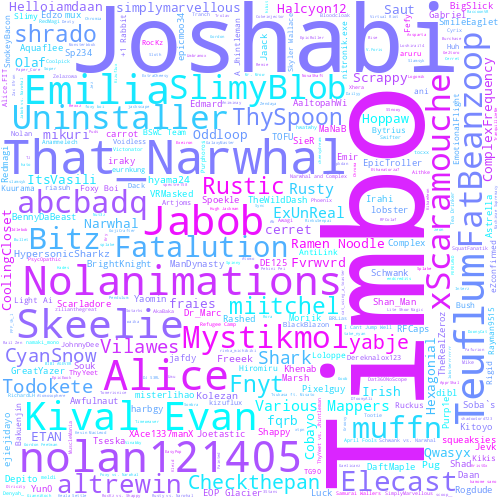

### [Ranked] MyBSCloud - LevelAuthor - weighted - 2023.05.01 - hatopop

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

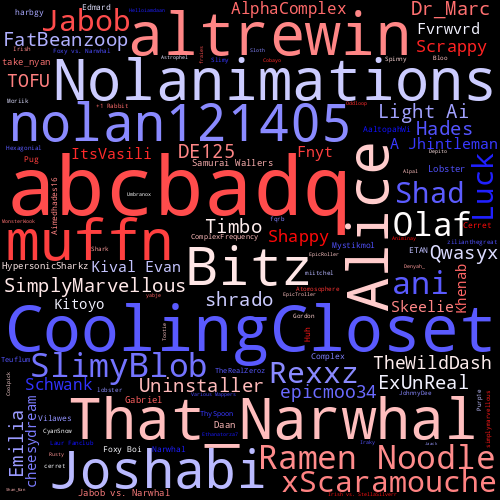

In [3]:
#@title ## MyBSCloud
#@markdown `wordcloud_target` determines what data from your play history will be used to create the wordcloud. Options include LevelAuthor (mapper), SongAuthor (song composer), Song (song title), mapper, and song composer.<br >
#@markdown The size of the words will vary based on their frequency of occurrence.<br >
#@markdown `max_words` sets an upper limit for the number of words displayed. If set to a lower value, less frequent words will be removed.<br >
#@markdown `additional_stopwords` are words you want to exclude from the wordcloud. Some words that are not relevant but appear frequently are set by default. Add more words separated by commas as needed.<br >
#@markdown When running the entire script, it will stop at MyBSCloud(Mask) for image upload, and further processing will not proceed until an image is uploaded.<br >
#@markdown In this case, execute the Cancel for MyBSCloud(Mask) to finish the process for now.<br >


#@markdown ---
#@markdown <h4>Enable</h4>
wordcloud_is_enable = True #@param {type:"boolean"}
download_is_enable = True #@param {type:"boolean"}
#@markdown ---
#@markdown <h4>Setting</h4>

 
width =  500 #@param {type:"number"}
height =  500 #@param {type:"number"}
max_words = 1000#@param {type:"number"}
background_color = "black" #param ["black", "white"]
# wordcloud_target = "Level&SongAuthor" #@param ["All(-Tags)","Level","LevelAuthor", "SongAuthor", "Level&SongAuthor", "Song", "Tags", "All"]
color_map= "bwr" #param['inferno', 'magma', 'plasma', 'viridis','Blues', 'BuGn', 'BuPu', 'GnBu','Greens', 'Greys', 'OrRd', 'Oranges','PuBu', 'PuBuGn', 'PuRd', 'Purples','RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd','binary', 'gist_yarg', 'gist_gray', 'gray','bone', 'pink', 'spring', 'summer','autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic','Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2','Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot','gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv', 'gist_rainbow', 'rainbow','jet', 'nipy_spectral', 'gist_ncar']
wordcloud_style= "normal"  #param["normal","random-icon-style","original-mask"]
additional_stopwords = "feat,ft,Remix,original,TV,Size,Ver,Mix,VS,Video,Game,Movie" #@param {type:"string"}
show_title = False #param {type:"boolean"}

#@markdown ---
#@markdown <h4>Target</h4>
wordcloud_target = "LevelAuthor" #@param ["LevelAuthor", "SongAuthor", "Level&SongAuthor"]
wordcloud_weight_target = "PPWeight" #param ["PP", "PPWeight"]
counted_target = "Ranked&UnRanked" #@param ["Ranked&UnRanked", "RankedOnly", "UnRankedOnly"]

filtered_level_min = 0 #param {type:"slider", min:0, max:15, step:1}
filtered_level_max = 15 #param {type:"slider", min:0, max:15, step:1}
filtered_pp_min = 0 #param {type:"slider", min:0, max:1000, step:10}
filtered_pp_max = 1000 #param {type:"slider", min:0, max:1000, step:10}
filtered_acc_min = 0 #param {type:"slider", min:0, max:100, step:1}
filtered_acc_max = 100 #param {type:"slider", min:0, max:100, step:1}
filtered_latest_is_enable = False #param {type:"boolean"}
filtered_ranked_is_enable = False #param {type:"boolean"}
filtered_fullcombo_is_enable = False #param {type:"boolean"}

def create_wordcloud(text):
    font_path_gothic = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
    wordcloud = WordCloud(
                        background_color="white",
                        max_words=max_words,
                        width=width, height=height,
                        # mask=img_color,
                        collocations=False,  # 単語の重複しないように
                        colormap="cool"#"tab20"#"flag"#olor_map
                          ).generate(text)

    # WordCloudの画像をPIL.Imageオブジェクトに変換
    wc_image = wordcloud.to_image()

    # 画像を保存
    # output_filename = "MyBSCloud_{}_{}.png".format(tz_ja.strftime("%Y%m%d_%H%M%S"), df_info["name"][0])
    output_filename = "MyBSCloud_{}_{}.png".format(tz_ja.strftime("%Y%m%d_%H%M%S"), clean_filename(df_info["name"][0]))

    wc_image.save(output_filename)

    # 画像をダウンロード
    if download_is_enable:
        files.download(output_filename)

    # PIL.Imageオブジェクトを表示
    wc_image.show()

def create_weighted_wordcloud(weights, mode="weighted", bg_clr="black", clr_map="bwr"):
    font_path_gothic = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'


    # STOPWORDSを適用して辞書を更新
    filtered_weights = remove_stopwords_from_frequencies(weights)

    # 重み付けを指定してワードクラウドを生成
    wordcloud = WordCloud(
                        background_color=bg_clr, 
                          max_words=max_words, 
                          width=width, height=height,
                          collocations = False,
                          colormap=clr_map
                        ).generate_from_frequencies(filtered_weights)

    # WordCloudの画像をPIL.Imageオブジェクトに変換
    wc_image = wordcloud.to_image()

    # 画像を保存
    # output_filename = "MyBSCloud_{}_{}_{}.png".format(mode, tz_ja.strftime("%Y%m%d_%H%M%S"), df_info["name"][0])
    output_filename = "MyBSCloud_{}_{}_{}.png".format(mode, tz_ja.strftime("%Y%m%d_%H%M%S"), clean_filename(df_info["name"][0]))

    wc_image.save(output_filename)

    # 画像をダウンロード
    if download_is_enable:
        files.download(output_filename)

    # PIL.Imageオブジェクトを表示
    wc_image.show()

# colormap参考記事
# https://karupoimou.hatenablog.com/entry/2019/05/17/153207

df_wordcloud = df_scores.copy()

# ランク用
df_wordcloud_ranked = df_wordcloud.copy()
df_wordcloud_ranked = df_wordcloud_ranked[(df_wordcloud_ranked['Ranked']==1)]
df_wordcloud_ranked = df_wordcloud_ranked[(1==1)
    & (df_wordcloud_ranked["Stars"] >= filtered_level_min)
    & (df_wordcloud_ranked["Stars"] < filtered_level_max)
    & (df_wordcloud_ranked["PP"] >= filtered_pp_min)
    & (df_wordcloud_ranked["PP"] < filtered_pp_max)
    & (df_wordcloud_ranked["Acc"] >= filtered_acc_min)
    & (df_wordcloud_ranked["Acc"] <= filtered_acc_max)]
df_wordcloud_ranked['PPWeightRounded'] = df_wordcloud_ranked['PPWeight'].apply(lambda x: round(float(x), 1))

# weights = get_wordcloud_weight(wordcloud_target, df_wordcloud_ranked)

if counted_target == "RankedOnly":
    df_wordcloud = df_wordcloud[(df_wordcloud['Ranked']==1)]
elif counted_target == "UnRankedOnly":
    df_wordcloud = df_wordcloud[(df_wordcloud['Ranked']!=1)]

if len(df_wordcloud) > 0 and wordcloud_is_enable:
    # 既存のストップワードに追加するストップワードをカンマで分割
    additional_stopwords_list = additional_stopwords.split(',')

    # ストップワードを追加
    for word in additional_stopwords_list:
        stripped_word = word.strip()
        if stripped_word:  # 空の文字列でない場合にのみ追加
            STOPWORDS.add(stripped_word)

    if counted_target == "UnRankedOnly":
        display(Markdown("""### [UnRanked] MyBSCloud - {} - counted - {} - {}""".format(wordcloud_target, tz_ja.strftime("%Y.%m.%d"), df_info["name"][0])))
    elif counted_target == "RankedOnly":
        display(Markdown("""### [Ranked] MyBSCloud - {} - counted - {} - {}""".format(wordcloud_target, tz_ja.strftime("%Y.%m.%d"), df_info["name"][0])))
    else:
        display(Markdown("""### MyBSCloud - {} - counted - {} - {}""".format(wordcloud_target, tz_ja.strftime("%Y.%m.%d"), df_info["name"][0])))
    counts = get_wordcloud_weight(wordcloud_target, df_wordcloud, True)
    create_weighted_wordcloud(counts, mode="counteed", bg_clr="white", clr_map="cool")

    # create_wordcloud(wc_text)
    display(Markdown("""### [Ranked] MyBSCloud - {} - weighted - {} - {}""".format(wordcloud_target, tz_ja.strftime("%Y.%m.%d"), df_info["name"][0])))
    # print("""\n[Ranked]MyBSCloud-PPweighted-{}-{}""".format(tz_ja.strftime("%Y.%m.%d"), df_info["name"][0]))
    weights = get_wordcloud_weight(wordcloud_target, df_wordcloud_ranked)
    create_weighted_wordcloud(weights)


else:
    print("データ件数が0件または フラグが無効のため WordCloud が作成できません。作成する場合は条件を見直してください。")


<IPython.core.display.Javascript object>

Please upload the mask image file (use the previous file if canceled):


Saving mask.png to mask (1).png
Uploaded file name: mask.png


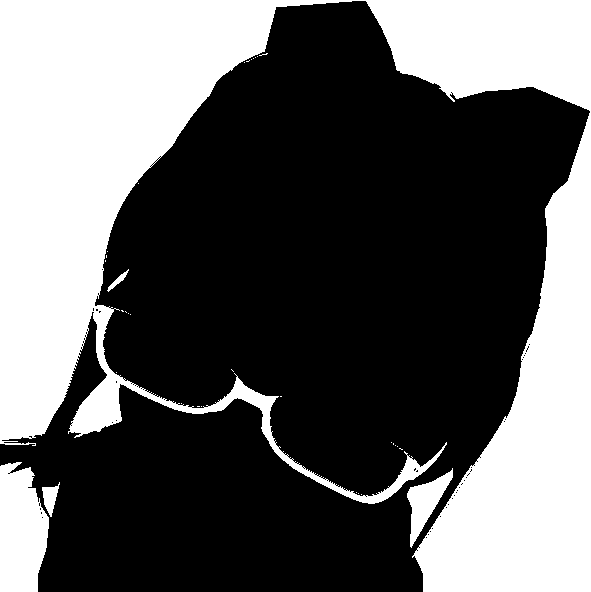

### MyBSCloud(Mask) - LevelAuthor - counted - 2023.05.01 - hatopop

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

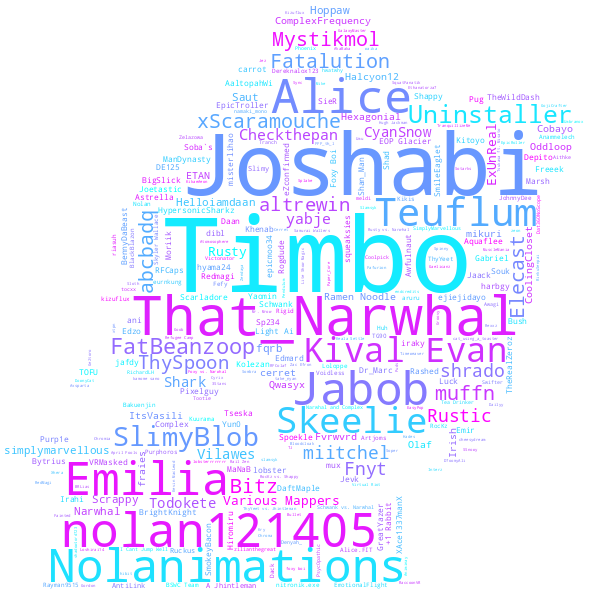

### [Ranked] MyBSCloud(Mask) - LevelAuthor - weighted - 2023.05.01 - hatopop

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

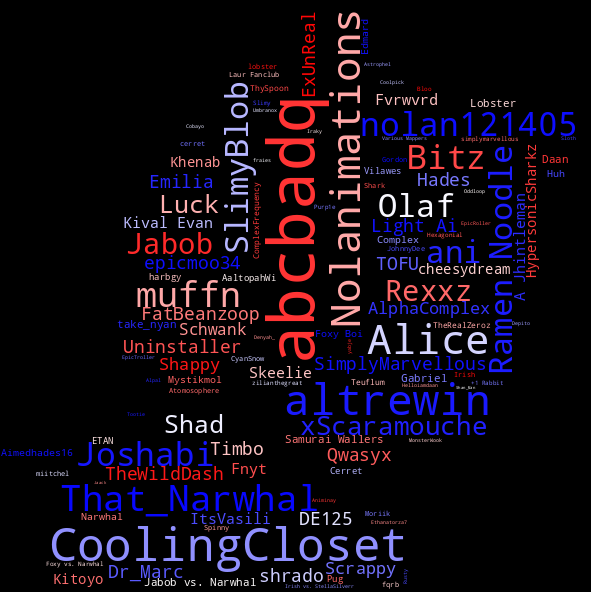

In [4]:
#@title ## MyBSCloud(Mask)

#@markdown ※ The default value (wordcloud_masked_is_enable) is disabled. Enable it if you want to use this feature.<br >
#@markdown ※ Uploading a mask image is required. After the first time, you can click Cancel to reuse the previous mask image.<br >
#@markdown 　Please upload a mask image that is pure black and white. The black part of the mask image will display the words.<br >
#@markdown 　Although the mask image is black and white, the image should be in RGB or RGBA format.<br >
#@markdown 　If you enable binarize_is_enable, it will perform binarization (making it black and white) and convert it to an RGBA format mask image, but the quality will be low.<br >
#@markdown 　You can change the binarization threshold with the threshold setting, but don't expect too much from it. 
#@markdown 　Please note that when using a transparent background image as input for binarization, the transparent part will be treated as black.<br >
#@markdown 　If you enable invert_is_enable, the output will be an inverted black and white version of the mask image.<br >
#@markdown 　The uploaded mask image and output image will be temporarily saved on Colab but will be discarded when the session is closed.<br >
#@markdown 　The output image size will be the size of the mask image multiplied by the up_scale factor.<br >
#@markdown 　Please note that the image processing time will obviously increase with the processing size.<br >
#@markdown 　When running the entire script, it will stop at MyBSCloud(Mask) for image upload, and further processing will not proceed until an image is uploaded.<br >
#@markdown 　In this case, execute the Cancel for MyBSCloud(Mask) to finish the process for now.<br >

#@markdown ---
#@markdown <h4>Enable</h4>
wordcloud_masked_is_enable = False #@param {type:"boolean"}
download_is_enable = True #@param {type:"boolean"}
#@title マスク画像の白黒反転
invert_is_enable = False #@param {type:"boolean"}

#@markdown ---
#@markdown <h4>Setting</h4>
up_scale = 1 #@param {type:"slider", min:0.25, max:4, step:0.25}

max_words =  1000#@param {type:"number"}

background_color = "black" #param ["black", "white"]
# wordcloud_target = "Level&SongAuthor" #@param ["All(-Tags)","Level","LevelAuthor", "SongAuthor", "Level&SongAuthor", "Song", "Tags", "All"]
color_map= "bwr" #param['inferno', 'magma', 'plasma', 'viridis','Blues', 'BuGn', 'BuPu', 'GnBu','Greens', 'Greys', 'OrRd', 'Oranges','PuBu', 'PuBuGn', 'PuRd', 'Purples','RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd','binary', 'gist_yarg', 'gist_gray', 'gray','bone', 'pink', 'spring', 'summer','autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic','Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2','Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot','gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv', 'gist_rainbow', 'rainbow','jet', 'nipy_spectral', 'gist_ncar']
wordcloud_style= "original-mask"  #param["normal","random-icon-style","original-mask"]
additional_stopwords = "feat,ft,Remix,original,TV,Size,Ver,Mix,VS,Video,Game,Movie" #@param {type:"string"}
mask_file_name = "mask.png" #param ["mask.png", "mask_face.png"] {allow-input: true}
show_title = False #param {type:"boolean"}

#@markdown ---
#@markdown <h4>binarize</h4>
binarize_is_enable = True #@param {type:"boolean"}
binarize_threshold =125 #@param {type:"slider", min:1, max:254, step:1}

#@markdown ---
filtered_latest_is_enable = False #param {type:"boolean"}
filtered_fullcombo_is_enable = False #param {type:"boolean"}

#@markdown <h4>Target</h4>
filtered_ranked_is_enable = False #param {type:"boolean"}

filtered_level_min = 0 #param {type:"slider", min:0, max:15, step:1}
filtered_level_max = 15 #param {type:"slider", min:0, max:15, step:1}
filtered_pp_min = 0 #param {type:"slider", min:0, max:1000, step:10}
filtered_pp_max = 1000 #param {type:"slider", min:0, max:1000, step:10}
filtered_acc_min = 0 #param {type:"slider", min:0, max:100, step:1}
filtered_acc_max = 100 #param {type:"slider", min:0, max:100, step:1}
wordcloud_target = "LevelAuthor" #@param ["LevelAuthor", "SongAuthor", "Level&SongAuthor"]
counted_target = "Ranked&UnRanked" #@param ["Ranked&UnRanked", "RankedOnly", "UnRankedOnly"]

# max_data =  5000#param {type:"number"}
sort_type = "PP" #param ["PP", "Stars", "Acc"] {allow-input: true}

def create_wordcloud_original_mask(text, img_path, invert_is_enable=False):
    font_path_gothic = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
    img = Image.open(img_path)
    width, height = img.size
    width, height =  math.floor(width * up_scale),  math.floor(height * up_scale)
    img_resized = img.resize((width, height))  # 画像をリサイズ
    img_color = np.array(img_resized)  # リサイズされた画像を配列に変換

    # フラグがTrueの場合、マスク画像の色を反転
    if invert_is_enable:
        img_color = np.invert(img_color)

    # print(img_color.shape)
   
    wordcloud = WordCloud(background_color="white",
                max_words=max_words, 
                width=width, 
                height=height,
                max_font_size=200,  # 最大フォントサイズを設定
                mask=img_color,
                collocations=False, # 単語の重複しないように
                colormap="cool"
                ).generate(text)

    # WordCloudの画像をPIL.Imageオブジェクトに変換
    wc_image = wordcloud.to_image()

    # 画像を保存
    if invert_is_enable:
        output_filename = "MyBSCloud_mask_{}_{}.png".format(tz_ja.strftime("%Y%m%d_%H%M%S"), clean_filename(df_info["name"][0]))
    else:
        output_filename = "MyBSCloud_mask_inv_{}_{}.png".format(tz_ja.strftime("%Y%m%d_%H%M%S"), clean_filename(df_info["name"][0]))

    wc_image.save(output_filename)

    # 画像をダウンロード
    if download_is_enable:
        files.download(output_filename)

    # PIL.Imageオブジェクトを表示
    wc_image.show()

def create_weighted_wordcloud_original_mask(weights, img_path, invert_is_enable=False, mode="weighted", bg_clr="black", clr_map="bwr"):
    font_path_gothic = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
    img = Image.open(img_path)
    width, height = img.size
    width, height =  math.floor(width * up_scale),  math.floor(height * up_scale)
    img_resized = img.resize((width, height))  # 画像をリサイズ
    img_color = np.array(img_resized)  # リサイズされた画像を配列に変換

    # フラグがTrueの場合、マスク画像の色を反転
    if invert_is_enable:
        img_color = np.invert(img_color)

    # print(img_color.shape)
   
    # 重み付けを指定してワードクラウドを生成
    wordcloud = WordCloud(background_color=bg_clr,
                        max_words=max_words,
                        width=width, height=height,
                        mask=img_color,
                        collocations=False,  # 単語の重複しないように
                        colormap=clr_map
                        ).generate_from_frequencies(weights)

    # WordCloudの画像をPIL.Imageオブジェクトに変換
    wc_image = wordcloud.to_image()

    # 画像を保存
    if invert_is_enable:
        output_filename = "MyBSCloud_mask_{}_{}_{}.png".format(mode,tz_ja.strftime("%Y%m%d_%H%M%S"), clean_filename(df_info["name"][0]))
    else:
        output_filename = "MyBSCloud_mask_{}_inv_{}_{}.png".format(mode,tz_ja.strftime("%Y%m%d_%H%M%S"), clean_filename(df_info["name"][0]))

    wc_image.save(output_filename)

    # 画像をダウンロード
    if download_is_enable:
        files.download(output_filename)

    # PIL.Imageオブジェクトを表示
    wc_image.show()

def binarize_image(img, threshold=128):
    # 画像をグレースケールに変換
    img_gray = img.convert('L')
    # 2値化処理
    img_binary = img_gray.point(lambda x: 0 if x < threshold else 255, '1')
    return img_binary

def create_binarize_image(img_path):
    img = Image.open(img_path)

    # 2値化処理
    img_binary = binarize_image(img)

    # 画像をRGBAに変換
    rgba_img = img_binary.convert('RGBA')

    # RGBA画像を保存
    rgba_img.save('rgba_image.png')

    # PIL.Imageオブジェクトを表示
    rgba_img.show()
    mask_image_path = "rgba_image.png"
    return mask_image_path

# colormap参考記事
# https://karupoimou.hatenablog.com/entry/2019/05/17/153207

df_wordcloud = df_scores.copy()

# ランク用
df_wordcloud_ranked = df_wordcloud.copy()
df_wordcloud_ranked = df_wordcloud_ranked[(df_wordcloud_ranked['Ranked']==1)]
df_wordcloud_ranked = df_wordcloud_ranked[(1==1)
    & (df_wordcloud_ranked["Stars"] >= filtered_level_min)
    & (df_wordcloud_ranked["Stars"] < filtered_level_max)
    & (df_wordcloud_ranked["PP"] >= filtered_pp_min)
    & (df_wordcloud_ranked["PP"] < filtered_pp_max)
    & (df_wordcloud_ranked["Acc"] >= filtered_acc_min)
    & (df_wordcloud_ranked["Acc"] <= filtered_acc_max)]
df_wordcloud_ranked['PPWeightRounded'] = df_wordcloud_ranked['PPWeight'].apply(lambda x: round(float(x), 1))
df_wordcloud_ranked = df_wordcloud_ranked.sort_values(sort_type, ascending=False)
# df_wordcloud_ranked = df_wordcloud_ranked[:max_data]

if counted_target == "RankedOnly":
    df_wordcloud = df_wordcloud[(df_wordcloud['Ranked']==1)]
elif counted_target == "UnRankedOnly":
    df_wordcloud = df_wordcloud[(df_wordcloud['Ranked']!=1)]

counts = get_wordcloud_weight(wordcloud_target, df_wordcloud, True)
weights = get_wordcloud_weight(wordcloud_target, df_wordcloud_ranked)

if len(df_wordcloud) > 0 and wordcloud_masked_is_enable:
    # 既存のストップワードに追加するストップワードをカンマで分割
    additional_stopwords_list = additional_stopwords.split(',')

    # ストップワードを追加
    for word in additional_stopwords_list:
        stripped_word = word.strip()
        if stripped_word:  # 空の文字列でない場合にのみ追加
            STOPWORDS.add(stripped_word)

    wc_text = get_wordcloud_text(wordcloud_target)

    print("Please upload the mask image file (use the previous file if canceled):")
    from google.colab import files

    # print("マスク画像ファイルをアップロードしてください（キャンセルで前回のファイルを使用）:")
    # from google.colab import files

    # previous_uploaded_file = None
    uploaded = files.upload()

    def process_uploaded_file(file_name, counts, weights, binarize_is_enable, invert_is_enable):
        if binarize_is_enable:
            file_name = create_binarize_image(file_name)

        display(Markdown("""### MyBSCloud(Mask) - {} - counted - {} - {}""".format(wordcloud_target, tz_ja.strftime("%Y.%m.%d"), df_info["name"][0])))
        # print(f"MyBSCloud(mask)-Counted-{tz_ja.strftime('%Y.%m.%d')}-{df_info['name'][0]}")
        # create_wordcloud_original_mask(wc_text, file_name, invert_is_enable)
        create_weighted_wordcloud_original_mask(counts, file_name, invert_is_enable, mode="counted", bg_clr="white", clr_map="cool")

        display(Markdown("""### [Ranked] MyBSCloud(Mask) - {} - weighted - {} - {}""".format(wordcloud_target, tz_ja.strftime("%Y.%m.%d"), df_info["name"][0])))
        # print(f"\n[Ranked]MyBSCloud(mask)-PPweighted-{tz_ja.strftime('%Y.%m.%d')}-{df_info['name'][0]}")
        create_weighted_wordcloud_original_mask(weights, file_name, invert_is_enable)


    if not uploaded:  # アップロードがキャンセルされた場合
        if previous_uploaded_file is not None:
            print(f"Using the previously uploaded file '{previous_uploaded_file}'.")
            # process_uploaded_file(previous_uploaded_file, wc_text, weights, binarize_is_enable, invert_is_enable)
            process_uploaded_file(previous_uploaded_file, counts, weights, binarize_is_enable, invert_is_enable)
        else:
            print("Upload was canceled.")

    else:  # アップロードが成功した場合
        file_name = next(iter(uploaded))

        previous_uploaded_file = file_name
        # 既存のファイルがある場合は削除
        if os.path.exists(file_name):
            os.remove(file_name)
        # アップロードされたファイルを保存
        with open(file_name, 'wb') as f:
            f.write(uploaded[file_name])
        # print(f"アップロードされたファイル名: {file_name}")
        # # process_uploaded_file(file_name, wc_text, weights, binarize_is_enable, invert_is_enable)
        # process_uploaded_file(file_name, counts, weights, binarize_is_enable, invert_is_enable)
        print(f"Uploaded file name: {file_name}")
        # process_uploaded_file(file_name, wc_text, weights, binarize_is_enable, invert_is_enable)
        process_uploaded_file(file_name, counts, weights, binarize_is_enable, invert_is_enable)

else:
    print("Cannot create WordCloud as there are 0 data entries or the flag is disabled. Please review the conditions if you want to create one.")
    # print("データ件数が0件または フラグが無効のため WordCloud が作成できません。作成する場合は条件を見直してください。")


# Data Summary

Description of data summary<br>

This is a fun feature using the ChatGPT API for data summarization. It takes into account the top n frequency values of mappers, Weight, artists' frequency values, and Weight without considering other relevancies and retrieves evaluation results. This is a fun feature that follows the trend.

※※※ Disclaimer ※※※

To use this feature, you need a valid OpenAI API key. The model used is "gpt-3.5-turbo". Please never share your API key or a notebook file containing the API key! The author cannot be held responsible if the API key is leaked, so please use it at your own risk.

If you exceed the free tier and use the API, you will be billed by OpenAI, but the author cannot be held responsible. Please use it at your own risk. The estimated charge per usage is the total token count × the price per token of the model, but the author cannot be held responsible for the actual price, so please use it at your own risk.

-> OpenAI billing amount: <https://platform.openai.com/account/usage>

In [5]:
#@title ## Data Summary
gpt_is_enable = False #@param {type:"boolean"}
openai_key = "" #@param {type:"string"}
top_n = 20 #@param {type:"number"}
model = "gpt-3.5-turbo" #@param ["gpt-3.5-turbo"] {allow-input: true}
MAX_TOKEN = 2048 #@param {type:"number"}
counted_target = "Ranked&UnRanked" #@param ["Ranked&UnRanked", "RankedOnly", "UnRankedOnly"]

try:
    import openai
except:
    !pip install openai==0.27.0
    import openai

openai.api_key = openai_key

def completion(new_message_text:str, settings_text:str = '', past_messages:list = []):
    if len(past_messages) == 0 and len(settings_text) != 0:
        system = {"role": "system", "content": settings_text}
        past_messages.append(system)
    new_message = {"role": "user", "content": new_message_text}
    past_messages.append(new_message)

    result = openai.ChatCompletion.create(
        model=model,
        messages=past_messages,
        max_tokens=MAX_TOKEN
    )
    response_message = {"role": "assistant", "content": result.choices[0].message.content}
    past_messages.append(response_message)
    response_message_text = result.choices[0].message.content
    prompt_token = result["usage"]["prompt_tokens"]
    total_token = result["usage"]["total_tokens"]
    finish_reason = result.choices[0].finish_reason
    return response_message_text, past_messages, prompt_token, total_token

from heapq import nlargest

def get_top_n(data, n):
    data_int = {k: math.floor(v) for k, v in data.items()}
    top_n = dict(nlargest(n, data_int.items(), key=lambda item: item[1]))
    return top_n


df_wordcloud = df_scores.copy()

# ランク用
df_wordcloud_ranked = df_wordcloud.copy()
df_wordcloud_ranked = df_wordcloud_ranked[(df_wordcloud_ranked['Ranked']==1)]
df_wordcloud_ranked = df_wordcloud_ranked[(1==1)
    & (df_wordcloud_ranked["Stars"] >= filtered_level_min)
    & (df_wordcloud_ranked["Stars"] < filtered_level_max)
    & (df_wordcloud_ranked["PP"] >= filtered_pp_min)
    & (df_wordcloud_ranked["PP"] < filtered_pp_max)
    & (df_wordcloud_ranked["Acc"] >= filtered_acc_min)
    & (df_wordcloud_ranked["Acc"] <= filtered_acc_max)]
df_wordcloud_ranked['PPWeightRounded'] = df_wordcloud_ranked['PPWeight'].apply(lambda x: round(float(x), 1))
df_wordcloud_ranked = df_wordcloud_ranked.sort_values(sort_type, ascending=False)
# df_wordcloud_ranked = df_wordcloud_ranked[:max_data]

if counted_target == "RankedOnly":
    df_wordcloud = df_wordcloud[(df_wordcloud['Ranked']==1)]
elif counted_target == "UnRankedOnly":
    df_wordcloud = df_wordcloud[(df_wordcloud['Ranked']!=1)]

counts = get_wordcloud_weight(wordcloud_target, df_wordcloud, True)
weights = get_wordcloud_weight(wordcloud_target, df_wordcloud_ranked)


# 翻訳
counts_mapper = get_wordcloud_weight("LevelAuthor", df_wordcloud, True)
weights_mapper = get_wordcloud_weight("LevelAuthor", df_wordcloud_ranked)

counts_artist = get_wordcloud_weight("SongAuthor", df_wordcloud, True)
weights_artist = get_wordcloud_weight("SongAuthor", df_wordcloud_ranked)

counts_mapper_dict = get_top_n(counts_mapper, top_n)
weights_mapper_dict = get_top_n(weights_mapper, top_n)

counts_artist_dict = get_top_n(counts_artist, top_n)
weights_artist_dict = get_top_n(weights_artist, top_n)

if len(openai_key) > 0 and gpt_is_enable:
    # system_settings = "与データに対して、プレイヤーの分析を行い、評価結果を返してください。player: player名\nmapper_counts: {'mapperA':'頻度数値A','mapperB':'頻度数値B',...}\nmapper_weights: {'mapperA':'スコアA','mapperB':'B',...}\nartist_counts: {'artistA':'頻度数値A','artistB':'頻度数値B',...}\nartist_weights: {'artistA':'スコアA','artistB':'B',...}\nマークダウン形式で総合評価レポートとして出力してください。\n## 分析結果\n### 0. プレイヤー名(player名)\n### 1. プレイするのに好みのmapper(表形式 top5)\n### 2. PPを食べるのに好みのmapper(表形式 top5)\n### 3. 共通して好みと言えるmapper(表形式 top3)\n### 4. プレイするのに好みのartist(表形式 top5)\n### 5. PPを食べるのに好みのartist(表形式 top5)\n### 6. 共通して好みと言えるartist(表形式 top3)\n### 7. まとめ(1～6の要約と、総合した所見を出力してください。)"

    # prompt_text = f"""プレイヤーの統計情報がこちらにあります。mapper_countsはプレイしたmapperの譜面数降順で、mapper_weightsはランク譜面のうちmapper事のPPweightの合計値の降順です。artists_countsはプレイしたartistの譜面数降順で、artists_weightsはランク譜面のうちartist事のPPweightの合計値の降順です。全て上位{top_n}を抽出したデータです。共通するmapper, artistもあると思います。player: {df_info["name"][0]} mapper_counts: {counts_mapper_dict} mapper_weights: {weights_mapper_dict} artist_counts: {counts_artist_dict} artist_weights: {weights_artist_dict}\n"""

    system_settings = "Please analyze the given data for the player and return an evaluation report. player: player_name\nmapper_counts: {'mapperA':'frequency_valueA','mapperB':'frequency_valueB',...}\nmapper_weights: {'mapperA':'scoreA','mapperB':'scoreB',...}\nartist_counts: {'artistA':'frequency_valueA','artistB':'frequency_valueB',...}\nartist_weights: {'artistA':'scoreA','artistB':'scoreB',...}\nOutput the overall evaluation report in markdown format.\n## Analysis Results\n### 0. Player Name (player_name)\n### 1. Preferred Mappers for Playing (table format, top 5)\n### 2. Preferred Mappers for PP (table format, top 5)\n### 3. Mappers Commonly Preferred (table format, top 3)\n### 4. Preferred Artists for Playing (table format, top 5)\n### 5. Preferred Artists for PP (table format, top 5)\n### 6. Artists Commonly Preferred (table format, top 3)\n### 7. Summary (Summarize points 1-6 and provide an overall evaluation.)"

    prompt_text = f"""Here is the player's statistical information. mapper_counts is the number of charts played by each mapper in descending order, and mapper_weights is the total PP weight for each mapper in descending order for ranked charts. artists_counts is the number of charts played by each artist in descending order, and artists_weights is the total PP weight for each artist in descending order for ranked charts. All data is extracted for the top {top_n}. There may be common mappers and artists as well. player: {df_info["name"][0]} mapper_counts: {counts_mapper_dict} mapper_weights: {weights_mapper_dict} artist_counts: {counts_artist_dict} artist_weights: {weights_artist_dict}\n"""

    # response_text, _, prompt_token, total_token = completion(prompt_text, system_settings, past_messages = [])

    print("Starting the analysis...")

    response_text, _, prompt_token, total_token = completion(prompt_text, system_settings, past_messages = [])
    # print(response_text)
    print(f"""Analysis is complete
    prompt token:{prompt_token}
    total token:{total_token}
    """)
    display(Markdown("""---"""))
    display(Markdown(response_text))
else:
    print("GPT feature is not enabled, so only the data summary will be output.")
    print("If you need insights, please enable the GPT feature.")

    def display_dataframe_from_dict(dictionary, key="key", val="val"):
        dataframe = pd.DataFrame(list(dictionary.items()), columns=[key, val])
        display(dataframe[:5])

    display(Markdown("---"))
    display(Markdown("## Summary"))
    display(Markdown(f"#### Player: {df_info['name'][0]}"))
    display(Markdown(f"#### Count target: {counted_target}"))

    display(Markdown("#### Preferred mappers to play (top 5)"))
    display_dataframe_from_dict(counts_mapper_dict, 'Mapper', 'Count')

    display(Markdown("#### Preferred mappers for eating PP (top 5)"))
    display_dataframe_from_dict(weights_mapper_dict, 'Mapper', 'Weight')

    display(Markdown("#### Preferred artists to play (top 5)"))
    display_dataframe_from_dict(counts_artist_dict, 'Artist', 'Count')

    display(Markdown("#### Preferred artists for eating PP (top 5)"))
    display_dataframe_from_dict(weights_artist_dict, 'Artist', 'Weight')


<IPython.core.display.Javascript object>

GPT feature is not enabled, so only the data summary will be output.
If you need insights, please enable the GPT feature.


---

## Summary

#### Player: hatopop

#### Count target: Ranked&UnRanked

#### Preferred mappers to play (top 5)

,Mapper,Count
0,Timbo,133
1,Joshabi,106
2,That_Narwhal,103
3,nolan121405,81
4,Alice,77


#### Preferred mappers for eating PP (top 5)

,Mapper,Weight
0,abcbadq,857
1,CoolingCloset,586
2,altrewin,520
3,Alice,476
4,Nolanimations,471


#### Preferred artists to play (top 5)

,Artist,Count
0,Camellia,209
1,Kobaryo,90
2,USAO,71
3,t+pazolite,62
4,Laur,54


#### Preferred artists for eating PP (top 5)

,Artist,Weight
0,Camellia,1005
1,Massive New Krew,534
2,MY FIRST STORY,390
3,Shiggy Jr.,336
4,USAO,327
